In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Configuración de visualización
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9



In [2]:
# Cargar y evaluar datos climáticos
climate_df = pd.read_csv('../data/raw/climate_data_2015_2024.csv')
climate_df['date'] = pd.to_datetime(climate_df['date'])

print("DATOS CLIMÁTICOS - EVALUACIÓN INICIAL")
print("=" * 50)
print(f"Registros totales: {len(climate_df):,}")
print(f"Periodo temporal: {climate_df['date'].min().date()} a {climate_df['date'].max().date()}")
print(f"Días únicos: {climate_df['date'].nunique():,}")
print(f"Ciudades disponibles ({climate_df['city'].nunique()}): {sorted(climate_df['city'].unique())}")
print(f"Variables climáticas: {[col for col in climate_df.columns if col not in ['date', 'city']]}")

# Estructura del dataset
print("\nEstructura del dataset:")
print(climate_df.info())

# Primeras observaciones
print("\nPrimeras 5 observaciones:")
display(climate_df.head())

DATOS CLIMÁTICOS - EVALUACIÓN INICIAL
Registros totales: 14,612
Periodo temporal: 2015-01-01 a 2024-12-31
Días únicos: 3,653
Ciudades disponibles (4): ['Barcelona', 'London', 'Madrid', 'Paris']
Variables climáticas: ['temp_max', 'temp_min', 'temp_mean', 'precipitation', 'rain', 'wind_speed_max', 'humidity_mean']

Estructura del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14612 entries, 0 to 14611
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            14612 non-null  datetime64[ns]
 1   city            14612 non-null  object        
 2   temp_max        14612 non-null  float64       
 3   temp_min        14612 non-null  float64       
 4   temp_mean       14612 non-null  float64       
 5   precipitation   14612 non-null  float64       
 6   rain            14612 non-null  float64       
 7   wind_speed_max  14612 non-null  float64       
 8   humidity_mean   14612 non-nu

,date,city,temp_max,temp_min,temp_mean,precipitation,rain,wind_speed_max,humidity_mean
0,2015-01-01,Madrid,9.0,-3.0,2.2,0.0,0.0,7.2,65
1,2015-01-02,Madrid,9.7,-3.5,2.2,0.0,0.0,4.6,70
2,2015-01-03,Madrid,9.6,-1.7,3.2,0.0,0.0,8.0,71
3,2015-01-04,Madrid,12.1,-1.9,4.0,0.0,0.0,5.4,73
4,2015-01-05,Madrid,10.4,0.2,4.4,0.0,0.0,8.4,78


In [3]:
# Cargar y evaluar datos de calidad del aire
air_df = pd.read_csv('../data/raw/air_quality_data_2020_2024.csv')
air_df['date'] = pd.to_datetime(air_df['date'])

print("DATOS DE CALIDAD DEL AIRE - EVALUACIÓN INICIAL")
print("=" * 50)
print(f"Registros totales: {len(air_df):,}")
print(f"Periodo temporal: {air_df['date'].min().date()} a {air_df['date'].max().date()}")
print(f"Días únicos: {air_df['date'].nunique():,}")
print(f"Ciudades disponibles ({air_df['city'].nunique()}): {sorted(air_df['city'].unique())}")
print(f"Contaminantes monitoreados: {sorted(air_df['parameter'].unique())}")

# Distribución de observaciones por contaminante
print("\nDistribución de mediciones por contaminante:")
contaminant_counts = air_df['parameter'].value_counts()
for param, count in contaminant_counts.items():
    percentage = (count / len(air_df)) * 100
    print(f"  {param.upper()}: {count:,} registros ({percentage:.1f}%)")

# Estructura del dataset
print("\nEstructura del dataset:")
print(air_df.info())

# Primeras observaciones
print("\nPrimeras 5 observaciones:")
display(air_df.head())

DATOS DE CALIDAD DEL AIRE - EVALUACIÓN INICIAL
Registros totales: 3,529
Periodo temporal: 2020-01-01 a 2024-12-31
Días únicos: 1,382
Ciudades disponibles (4): ['Barcelona', 'London', 'Madrid', 'Paris']
Contaminantes monitoreados: ['co', 'no2', 'pm10']

Distribución de mediciones por contaminante:
  NO2: 3,029 registros (85.8%)
  PM10: 325 registros (9.2%)
  CO: 175 registros (5.0%)

Estructura del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3529 non-null   datetime64[ns]
 1   city       3529 non-null   object        
 2   parameter  3529 non-null   object        
 3   value      3529 non-null   float64       
 4   unit       3529 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 138.0+ KB
None

Primeras 5 observaciones:


,date,city,parameter,value,unit
0,2020-01-01,Madrid,no2,59.90,µg/m³
1,2020-01-02,Barcelona,no2,31.00,µg/m³
2,2020-01-04,Barcelona,no2,27.00,µg/m³
3,2020-01-05,Barcelona,no2,28.75,µg/m³
4,2020-01-05,Madrid,no2,82.00,µg/m³


In [4]:
# Análisis de calidad de datos y completitud temporal
print("ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 50)

# 1. Evaluación de valores nulos en datos climáticos
print("1. DATOS CLIMÁTICOS - Valores nulos:")
climate_nulls = climate_df.isnull().sum()
climate_null_pct = (climate_nulls / len(climate_df)) * 100

for col in climate_df.columns:
    if climate_nulls[col] > 0:
        print(f"   {col}: {climate_nulls[col]:,} ({climate_null_pct[col]:.2f}%)")
    else:
        print(f"   {col}: Sin valores nulos")

# 2. Evaluación de valores nulos en datos de aire
print("\n2. DATOS DE AIRE - Valores nulos:")
air_nulls = air_df.isnull().sum()
air_null_pct = (air_nulls / len(air_df)) * 100

for col in air_df.columns:
    if air_nulls[col] > 0:
        print(f"   {col}: {air_nulls[col]:,} ({air_null_pct[col]:.2f}%)")
    else:
        print(f"   {col}: Sin valores nulos")

# 3. Identificación del periodo común
climate_start = climate_df['date'].min()
climate_end = climate_df['date'].max()
air_start = air_df['date'].min()
air_end = air_df['date'].max()

common_start = max(climate_start, air_start)
common_end = min(climate_end, air_end)

print(f"\n3. ANÁLISIS TEMPORAL:")
print(f"   Datos climáticos: {climate_start.date()} a {climate_end.date()}")
print(f"   Datos de aire: {air_start.date()} a {air_end.date()}")
print(f"   Periodo común: {common_start.date()} a {common_end.date()}")
print(f"   Días en periodo común: {(common_end - common_start).days}")

# 4. Ciudades disponibles en cada dataset
climate_cities = set(climate_df['city'].unique())
air_cities = set(air_df['city'].unique())
common_cities = climate_cities.intersection(air_cities)

print(f"\n4. DISPONIBILIDAD DE CIUDADES:")
print(f"   Clima: {sorted(climate_cities)}")
print(f"   Aire: {sorted(air_cities)}")
print(f"   Comunes: {sorted(common_cities)}")
print(f"   Total ciudades comunes: {len(common_cities)}")

ANÁLISIS DE CALIDAD DE DATOS
1. DATOS CLIMÁTICOS - Valores nulos:
   date: Sin valores nulos
   city: Sin valores nulos
   temp_max: Sin valores nulos
   temp_min: Sin valores nulos
   temp_mean: Sin valores nulos
   precipitation: Sin valores nulos
   rain: Sin valores nulos
   wind_speed_max: Sin valores nulos
   humidity_mean: Sin valores nulos

2. DATOS DE AIRE - Valores nulos:
   date: Sin valores nulos
   city: Sin valores nulos
   parameter: Sin valores nulos
   value: Sin valores nulos
   unit: Sin valores nulos

3. ANÁLISIS TEMPORAL:
   Datos climáticos: 2015-01-01 a 2024-12-31
   Datos de aire: 2020-01-01 a 2024-12-31
   Periodo común: 2020-01-01 a 2024-12-31
   Días en periodo común: 1826

4. DISPONIBILIDAD DE CIUDADES:
   Clima: ['Barcelona', 'London', 'Madrid', 'Paris']
   Aire: ['Barcelona', 'London', 'Madrid', 'Paris']
   Comunes: ['Barcelona', 'London', 'Madrid', 'Paris']
   Total ciudades comunes: 4


In [5]:
# Estadísticas descriptivas detalladas
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 50)

# Variables climáticas numéricas
numeric_climate_cols = ['temp_max', 'temp_min', 'temp_mean', 'precipitation', 
                       'rain', 'wind_speed_max', 'humidity_mean']

print("1. VARIABLES CLIMÁTICAS:")
climate_stats = climate_df[numeric_climate_cols].describe()
print(climate_stats.round(2))

# Estadísticas por contaminante
print("\n2. CONTAMINANTES - Estadísticas por parámetro:")
for param in sorted(air_df['parameter'].unique()):
    param_data = air_df[air_df['parameter'] == param]['value']
    print(f"\n   {param.upper()}:")
    print(f"     Registros: {len(param_data):,}")
    print(f"     Media: {param_data.mean():.2f} µg/m³")
    print(f"     Mediana: {param_data.median():.2f} µg/m³")
    print(f"     Desv. estándar: {param_data.std():.2f}")
    print(f"     Mínimo: {param_data.min():.2f}")
    print(f"     Máximo: {param_data.max():.2f}")
    print(f"     Ciudades con datos: {air_df[air_df['parameter'] == param]['city'].nunique()}")

# Cobertura temporal por ciudad en periodo común
print("\n3. COBERTURA EN PERIODO COMÚN (2020-2024):")
climate_common = climate_df[(climate_df['date'] >= common_start) & 
                           (climate_df['date'] <= common_end)]
air_common = air_df[(air_df['date'] >= common_start) & 
                   (air_df['date'] <= common_end)]

for city in sorted(common_cities):
    climate_count = len(climate_common[climate_common['city'] == city])
    air_count = len(air_common[air_common['city'] == city])
    
    # Años con datos de aire para esta ciudad
    city_air_data = air_common[air_common['city'] == city]
    air_years = sorted(city_air_data['date'].dt.year.unique()) if len(city_air_data) > 0 else []
    
    print(f"   {city}:")
    print(f"     Clima: {climate_count:,} registros")
    print(f"     Aire: {air_count:,} registros")
    print(f"     Años con datos de aire: {air_years}")

ESTADÍSTICAS DESCRIPTIVAS
1. VARIABLES CLIMÁTICAS:
       temp_max  temp_min  temp_mean  precipitation      rain  wind_speed_max  \
count  14612.00  14612.00   14612.00       14612.00  14612.00        14612.00   
mean      18.38      9.68      13.93           1.80      1.78           18.68   
std        7.67      6.40       6.96           4.48      4.45            7.23   
min       -2.20    -11.20      -5.00           0.00      0.00            3.50   
25%       12.60      4.90       8.70           0.00      0.00           13.40   
50%       17.70      9.30      13.20           0.00      0.00           17.50   
75%       23.60     14.40      18.90           1.50      1.40           22.70   
max       41.30     26.00      33.50         103.70    103.70           68.00   

       humidity_mean  
count       14612.00  
mean           71.87  
std            15.91  
min            14.00  
25%            65.00  
50%            75.00  
75%            83.00  
max           100.00  

2. CONTAMIN

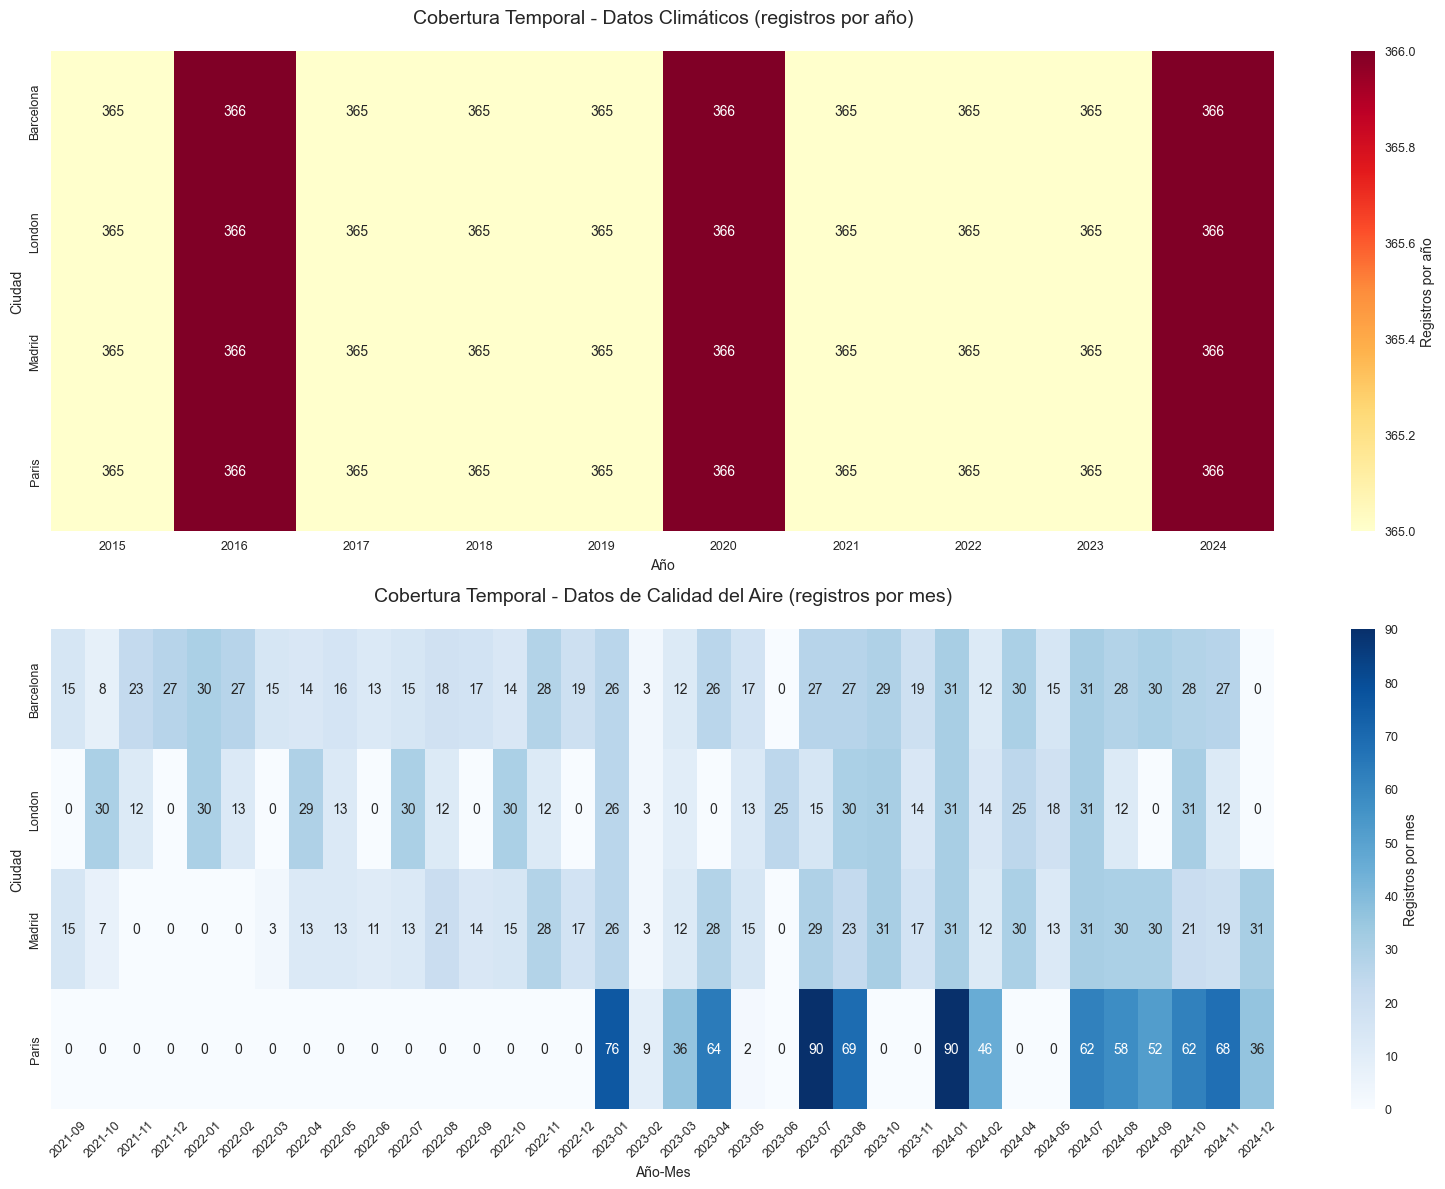

In [6]:
# Visualización de cobertura temporal

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# 1. Heatmap de datos climáticos por año
climate_coverage = climate_df.groupby(['city', climate_df['date'].dt.year]).size().unstack(fill_value=0)
sns.heatmap(climate_coverage, annot=True, fmt='d', cmap='YlOrRd', ax=axes[0], 
            cbar_kws={'label': 'Registros por año'})
axes[0].set_title('Cobertura Temporal - Datos Climáticos (registros por año)', fontsize=14, pad=20)
axes[0].set_xlabel('Año')
axes[0].set_ylabel('Ciudad')

# 2. Heatmap de datos de aire por año-mes
air_df['year_month'] = air_df['date'].dt.to_period('M')
air_coverage = air_df.groupby(['city', 'year_month']).size().unstack(fill_value=0)

# Limitar a últimos 36 meses
if air_coverage.shape[1] > 36:
    air_coverage = air_coverage.iloc[:, -36:]

sns.heatmap(air_coverage, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            cbar_kws={'label': 'Registros por mes'})
axes[1].set_title('Cobertura Temporal - Datos de Calidad del Aire (registros por mes)', fontsize=14, pad=20)
axes[1].set_xlabel('Año-Mes')
axes[1].set_ylabel('Ciudad')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('../reports/figures/air_evolucion_NO2_ciudades_europeas.png', dpi=300, bbox_inches='tight')
plt.show()

# Limpiar variable temporal
air_df.drop(['year_month'], axis=1, inplace=True, errors='ignore')


ANÁLISIS DE DISPONIBILIDAD DE DATOS POR CONTAMINANTE
Matriz de disponibilidad (número de registros):
city       Barcelona  London  Madrid  Paris
parameter                                  
co                 0       0       0    175
no2              955     918     836    320
pm10               0       0       0    325

RESUMEN POR CONTAMINANTE:

CO:
  Ciudades: ['Paris'] (1 ciudades)
  Total registros: 175
    - Paris: 175 registros

NO2:
  Ciudades: ['Barcelona', 'London', 'Madrid', 'Paris'] (4 ciudades)
  Total registros: 3,029
    - Barcelona: 955 registros
    - London: 918 registros
    - Madrid: 836 registros
    - Paris: 320 registros

PM10:
  Ciudades: ['Paris'] (1 ciudades)
  Total registros: 325
    - Paris: 325 registros


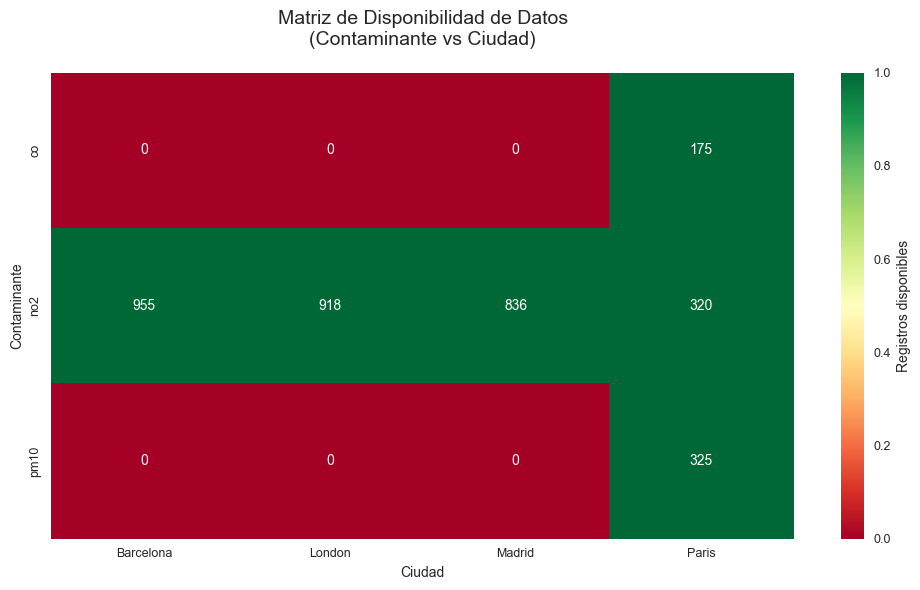

In [7]:
# Análisis detallado de disponibilidad de datos por contaminante y ciudad
print("\nANÁLISIS DE DISPONIBILIDAD DE DATOS POR CONTAMINANTE")
print("=" * 60)

# Crear matriz de disponibilidad
availability_matrix = air_df.groupby(['parameter', 'city']).size().unstack(fill_value=0)
print("Matriz de disponibilidad (número de registros):")
print(availability_matrix)

print("\n" + "=" * 60)
print("RESUMEN POR CONTAMINANTE:")
for param in sorted(air_df['parameter'].unique()):
    param_cities = air_df[air_df['parameter'] == param]['city'].unique()
    param_records = len(air_df[air_df['parameter'] == param])
    print(f"\n{param.upper()}:")
    print(f"  Ciudades: {sorted(param_cities)} ({len(param_cities)} ciudades)")
    print(f"  Total registros: {param_records:,}")
    
    # Distribución por ciudad para este contaminante
    for city in sorted(param_cities):
        city_records = len(air_df[(air_df['parameter'] == param) & (air_df['city'] == city)])
        print(f"    - {city}: {city_records:,} registros")

# Visualización de matriz de disponibilidad
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.heatmap(availability_matrix > 0, annot=availability_matrix, fmt='d', 
            cmap='RdYlGn', ax=ax, cbar_kws={'label': 'Registros disponibles'})
ax.set_title('Matriz de Disponibilidad de Datos\n(Contaminante vs Ciudad)', fontsize=14, pad=20)
ax.set_xlabel('Ciudad')
ax.set_ylabel('Contaminante')
plt.tight_layout()
plt.savefig('../reports/figures/air_contaminantes_especificos_paris.png', dpi=300, bbox_inches='tight')
plt.show()


SERIES TEMPORALES POR TIPO DE DISPONIBILIDAD
Contaminantes multi-ciudad: ['no2']
Contaminantes específicos de París: ['co', 'pm10']

1. ANÁLISIS COMPARATIVO - NO2


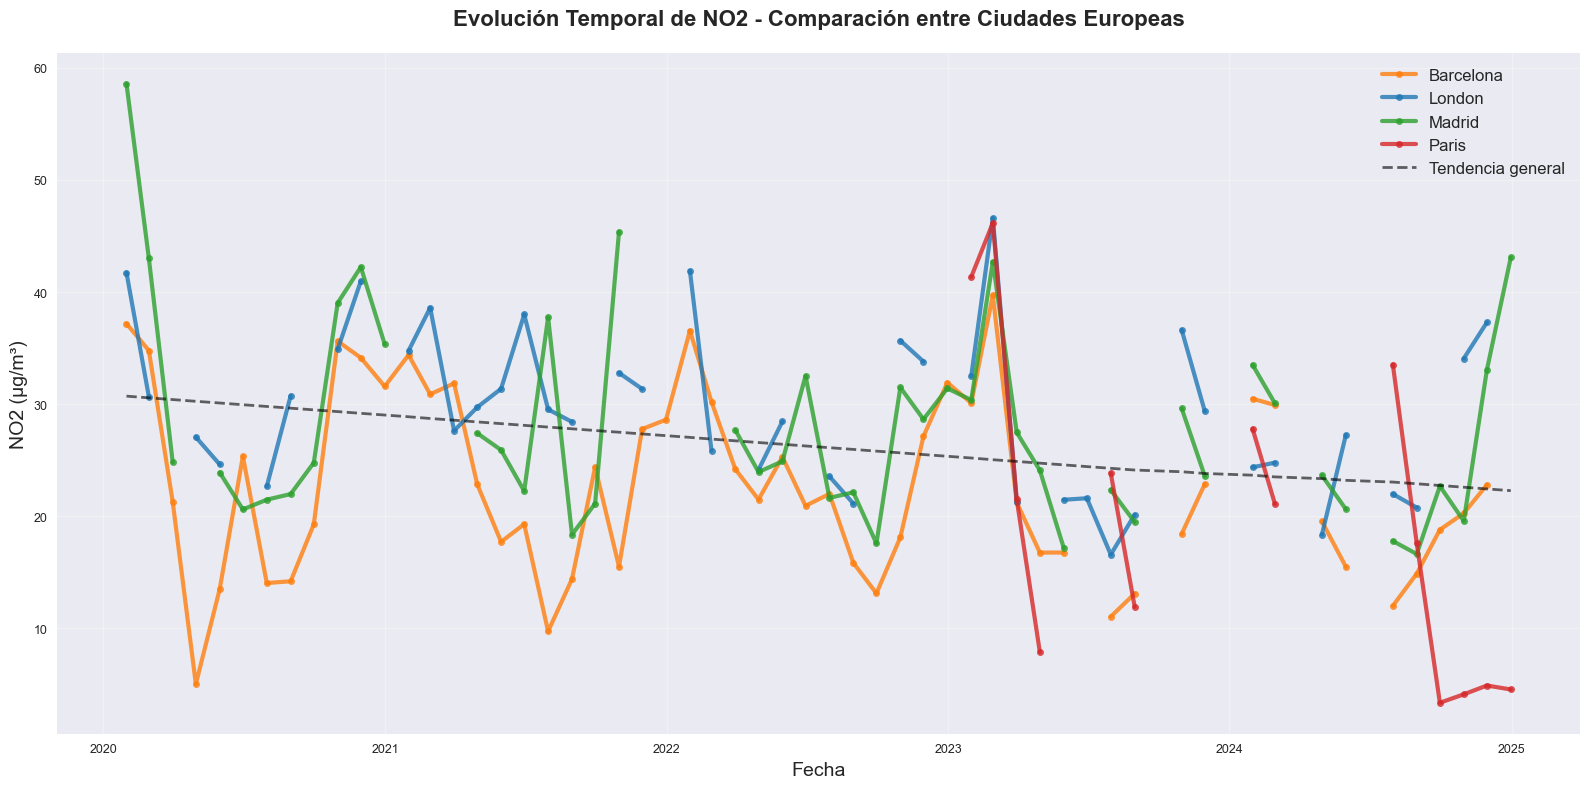


2. CONTAMINANTES ESPECÍFICOS DE PARÍS


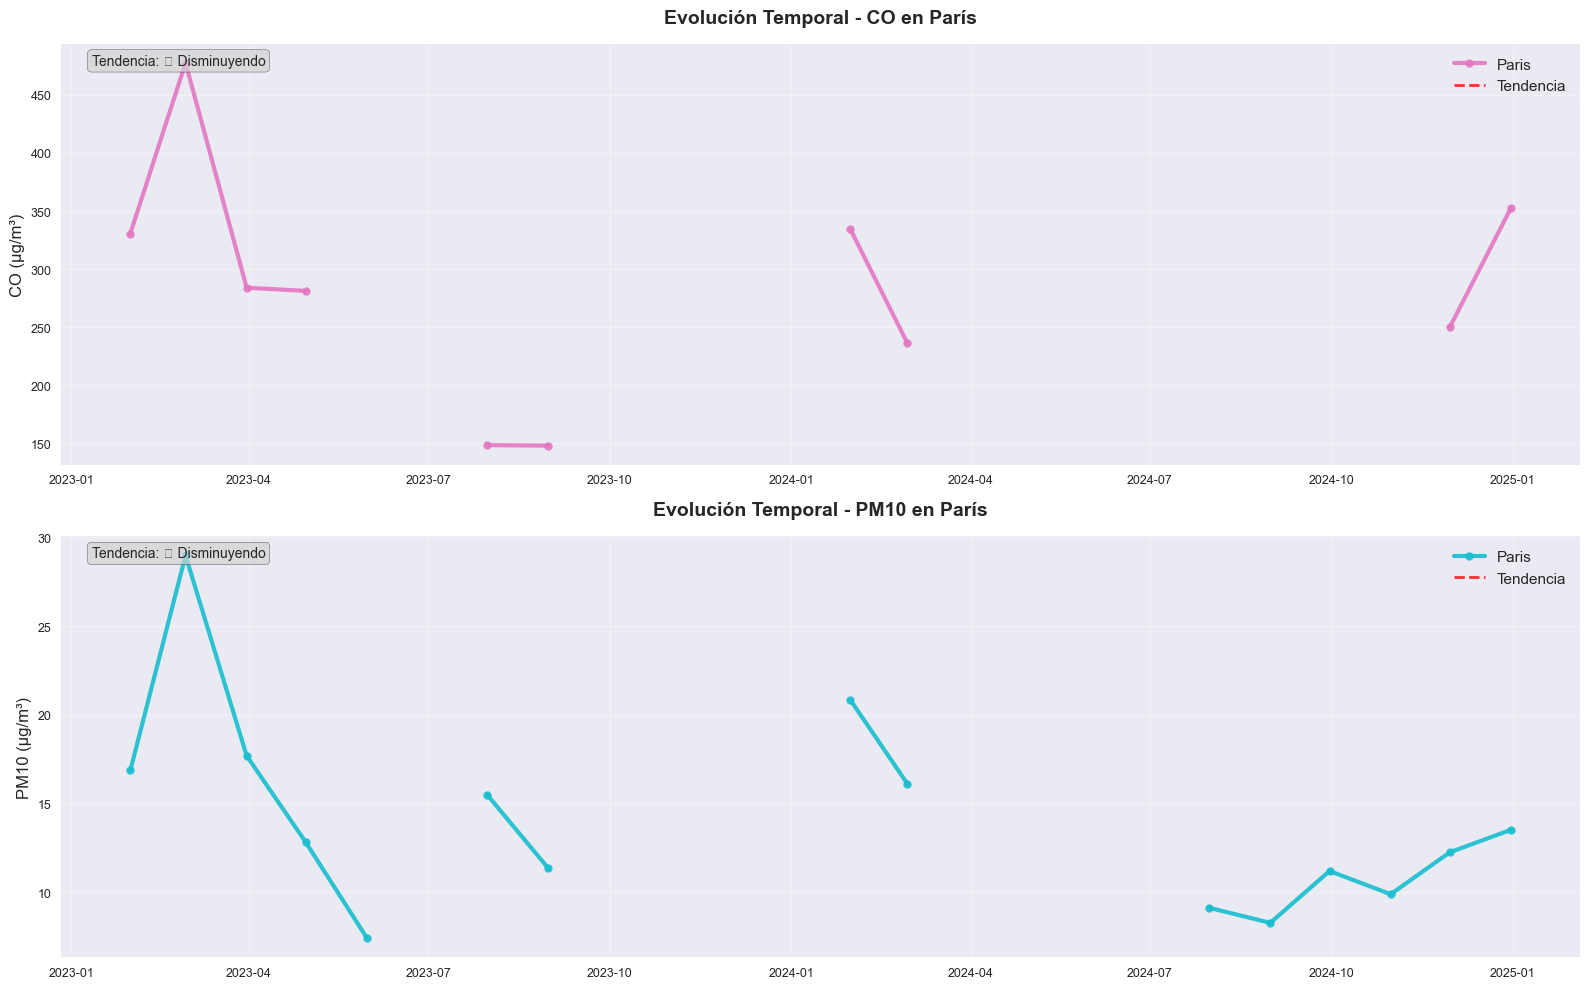


3. RESUMEN ESTADÍSTICO POR CONTAMINANTE


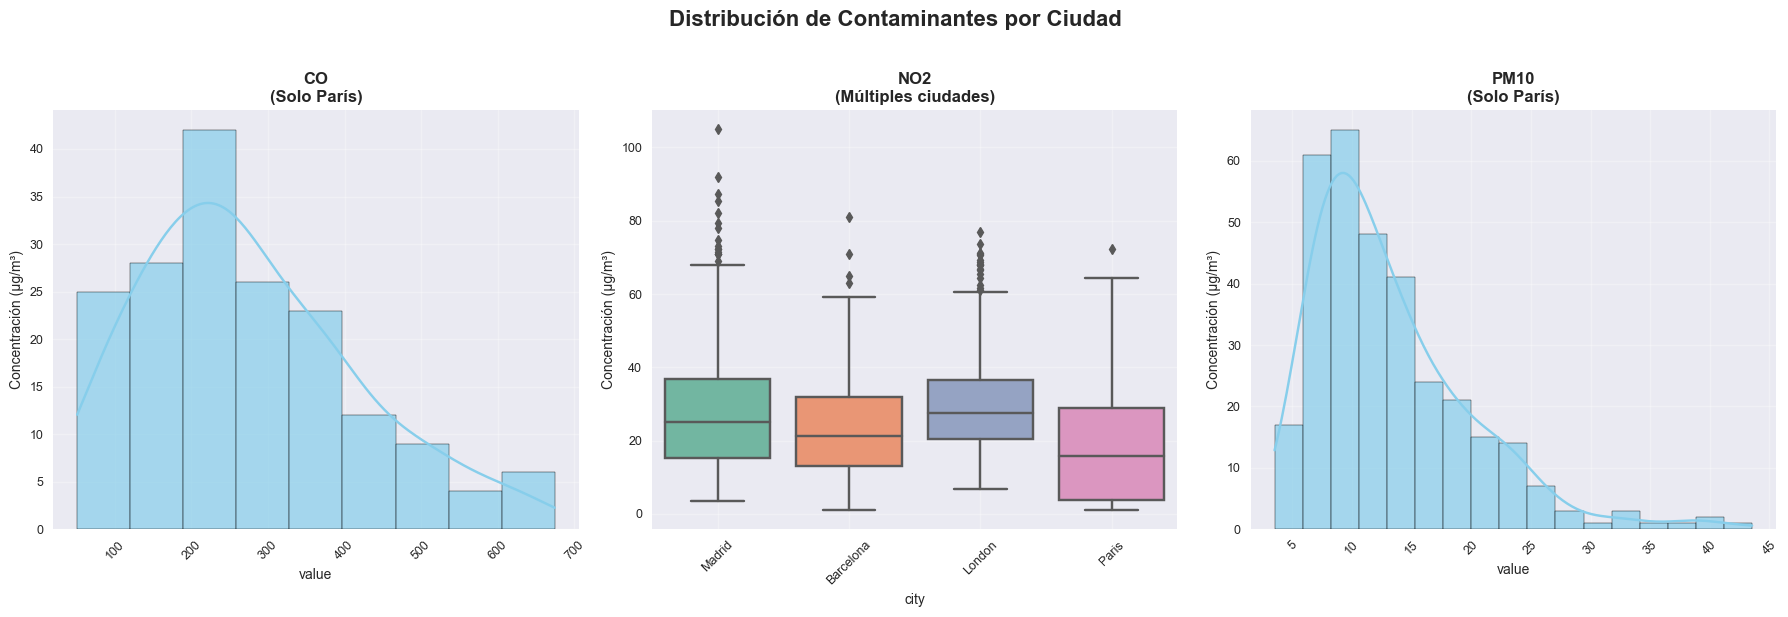

In [ ]:
# Series temporales
print("\nSERIES TEMPORALES POR TIPO DE DISPONIBILIDAD")
print("=" * 60)

# Identificar tipos de contaminantes
multi_city_params = []
single_city_params = []

for param in sorted(air_df['parameter'].unique()):
    param_cities = air_df[air_df['parameter'] == param]['city'].nunique()
    if param_cities > 1:
        multi_city_params.append(param)
    else:
        single_city_params.append(param)

print(f"Contaminantes multi-ciudad: {multi_city_params}")
print(f"Contaminantes específicos de París: {single_city_params}")

# 1. Contaminantes con múltiples ciudades
if multi_city_params:
    print(f"\n1. ANÁLISIS COMPARATIVO - {multi_city_params[0].upper()}")
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 8))
    
    param = multi_city_params[0]  # NO2
    param_data = air_df[air_df['parameter'] == param]
    
    colors = {'Barcelona': '#ff7f0e', 'London': '#1f77b4', 'Madrid': '#2ca02c', 'Paris': '#d62728'}
    
    for city in sorted(param_data['city'].unique()):
        city_data = param_data[param_data['city'] == city]
        monthly_data = city_data.set_index('date').resample('M')['value'].mean()
        
        ax.plot(monthly_data.index, monthly_data.values, 
                marker='o', label=city, alpha=0.8, linewidth=3, 
                markersize=5, color=colors.get(city, '#7f7f7f'))
    
    ax.set_title(f'Evolución Temporal de {param.upper()} - Comparación entre Ciudades Europeas', 
                 fontsize=16, pad=20, fontweight='bold')
    ax.set_ylabel(f'{param.upper()} (µg/m³)', fontsize=14)
    ax.set_xlabel('Fecha', fontsize=14)
    ax.legend(fontsize=12, loc='upper right')
    ax.grid(True, alpha=0.3)
    
    # Tendencia general
    param_monthly = param_data.set_index('date').resample('M')['value'].mean().dropna()
    if len(param_monthly) > 1:
        z = np.polyfit(range(len(param_monthly)), param_monthly.values, 1)
        p = np.poly1d(z)
        ax.plot(param_monthly.index, p(range(len(param_monthly))), 
                "k--", alpha=0.6, linewidth=2, label='Tendencia general')
        ax.legend(fontsize=12)
    
    plt.tight_layout()
    plt.savefig('../reports/figures/evolucion_temporal.png', dpi=300, bbox_inches='tight')
    plt.show()

# 2. Contaminantes específicos de París
if single_city_params:
    print(f"\n2. CONTAMINANTES ESPECÍFICOS DE PARÍS")
    
    n_single = len(single_city_params)
    fig, axes = plt.subplots(n_single, 1, figsize=(16, 5*n_single))
    
    if n_single == 1:
        axes = [axes]
    
    colors_paris = {'co': '#e377c2', 'pm10': '#17becf'}
    
    for i, param in enumerate(single_city_params):
        param_data = air_df[air_df['parameter'] == param]
        monthly_data = param_data.set_index('date').resample('M')['value'].mean()
        
        color = colors_paris.get(param, '#2ca02c')
        
        axes[i].plot(monthly_data.index, monthly_data.values, 
                    marker='o', label='Paris', alpha=0.9, linewidth=3, 
                    markersize=6, color=color)
        
        axes[i].set_title(f'Evolución Temporal - {param.upper()} en París', 
                         fontsize=14, pad=15, fontweight='bold')
        axes[i].set_ylabel(f'{param.upper()} (µg/m³)', fontsize=12)
        axes[i].legend(fontsize=11)
        axes[i].grid(True, alpha=0.3)
        
        # Tendencia con mejor visualización
        if len(monthly_data) > 1:
            z = np.polyfit(range(len(monthly_data)), monthly_data.values, 1)
            p = np.poly1d(z)
            trend_line = p(range(len(monthly_data)))
            axes[i].plot(monthly_data.index, trend_line, 
                        "r--", alpha=0.8, linewidth=2, label='Tendencia')
            
            # Mostrar pendiente de la tendencia
            slope = z[0]
            direction = "↗ Aumentando" if slope > 0 else "↘ Disminuyendo"
            axes[i].text(0.02, 0.95, f'Tendencia: {direction}', 
                        transform=axes[i].transAxes, fontsize=10,
                        bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.7))
            
            axes[i].legend(fontsize=11)
    
    plt.tight_layout()
    plt.show()

# 3. Resumen estadístico visual
print(f"\n3. RESUMEN ESTADÍSTICO POR CONTAMINANTE")

fig, axes = plt.subplots(1, len(air_df['parameter'].unique()), figsize=(18, 6))

for i, param in enumerate(sorted(air_df['parameter'].unique())):
    param_data = air_df[air_df['parameter'] == param]
    
    if param_data['city'].nunique() > 1:
        # Múltiples ciudades - boxplot comparativo
        sns.boxplot(data=param_data, x='city', y='value', ax=axes[i], palette='Set2')
        axes[i].set_title(f'{param.upper()}\n(Múltiples ciudades)', fontsize=12, fontweight='bold')
    else:
        # Una sola ciudad - distribución
        sns.histplot(data=param_data, x='value', ax=axes[i], kde=True, color='skyblue', alpha=0.7)
        axes[i].set_title(f'{param.upper()}\n(Solo París)', fontsize=12, fontweight='bold')
    
    axes[i].set_ylabel('Concentración (µg/m³)', fontsize=10)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Distribución de Contaminantes por Ciudad', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../reports/figures/air_distribucion_contaminantes_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()